# CS-651-A TEXT BASED ANALYSIS
# Sai Vandana - 0939231
# Classwork - 7 5/11/2024

### To read un-general-debates-blueprint.csv file

In [1]:
import pandas as pd
file = r"un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


### The code displays the first 400 characters of the content in the respective row of the DataFrame df.

In [2]:
print(repr(df.iloc[2666]["text"][0:400]))
print(repr(df.iloc[4726]["text"][0:400])) 

'\ufeffIt is indeed a pleasure for me and the members of my delegation to extend to Ambassador Garba our sincere congratulations on his election to the presidency of the forty-fourth session of the General Assembly. His election to this high office is a well-deserved tribute to his personal qualities and experience. I am fully confident that under his able and wise leadership the Assembly will further c'
'\ufeffI wish to join\nother representatives in congratulating you, Sir, on\nyour unanimous election as President of the fifty-sixth\nsession of the General Assembly. We are confident that\n27\n\nunder your able guidance the work of this General\nAssembly session will be another milestone on the new\ninternational scene, particularly in confronting the new\nchallenges facing our world, especially after the\nextre'


###  Splits the text of each entry in the DataFrame df into paragraphs

In [3]:
import re
df["paragraphs"] = df["text"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

In [7]:

stopwords_list = list(stopwords)


### Initializes a TfidfVectorizer fits and transforms the text column of the dataframe into TF-IDF vectors, and outputs the shape of the resulting TF-IDF matrix.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert set of stopwords to a list
stopwords_list = list(stopwords)

# Create the TfidfVectorizer with the correct parameter
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])

# Check the shape of the resulting vectors
tfidf_text_vectors.shape


(7507, 24611)

### Creates a new dataframe paragraph_df by flattening the paragraphs column of df into individual paragraphs, each associated with its corresponding year

In [10]:
paragraph_df = pd.DataFrame([{ "text": paragraph, "year": year }
               for paragraphs, year in zip(df["paragraphs"], df["year"])
                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

,text,year
0,33: May I first convey to our President the co...,1970
1,35.\tThe utilization of the United Nations to ...,1970
2,36.\tThe whole of progressive mankind recalls ...,1970
3,37.\tAll this has had well known consequences ...,1970
4,38.\tOne of the undeniable proofs that the Uni...,1970
5,"39.\tUndoubtedly, such a state of affairs in t...",1970
6,40.\tThe liberation movement at the world leve...,1970
7,41.\tPanic-stricken at the impetuous growth of...,1970
8,42.\tAlthough split by numerous contradictions...,1970
9,"43.\tIn that connexion we can cite, simultaneo...",1970


### Initializes a TfidfVectorizer with a custom list of stop words and specified frequency thresholds, fits and transforms the text column of paragraph_df into TF-IDF vectors, and outputs the shape of the resulting TF-IDF matrix.

In [11]:
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list,min_df=5, max_df=0.7)
tfidf_para_vectors =tfidf_para_vectorizer.fit_transform(paragraph_df["text"])
tfidf_para_vectors.shape

C:\Users\tsaiv\anaconda3\anaconda jupyter\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(279076, 25162)

### Initializes an NMF model with 10 components

In [12]:
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

C:\Users\tsaiv\anaconda3\anaconda jupyter\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


### Defines a function display_topics to print the top words for each topic in a given model

In [13]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],abs(words[largest[i]]*100.0/total)))

display_topics(nmf_text_model,
tfidf_text_vectorizer.get_feature_names_out())


Topic 00
 co (0.79)
 operation (0.65)
 disarmament (0.36)
 nuclear (0.34)
 relations (0.25)

Topic 01
 terrorism (0.38)
 challenges (0.32)
 sustainable (0.30)
 millennium (0.29)
 reform (0.28)

Topic 02
 africa (1.15)
 african (0.82)
 south (0.63)
 namibia (0.36)
 delegation (0.30)

Topic 03
 arab (1.02)
 israel (0.89)
 palestinian (0.60)
 lebanon (0.54)
 israeli (0.54)

Topic 04
 american (0.33)
 america (0.31)
 latin (0.31)
 panama (0.21)
 bolivia (0.21)

Topic 05
 pacific (1.55)
 islands (1.23)
 solomon (0.86)
 island (0.82)
 fiji (0.71)

Topic 06
 soviet (0.81)
 republic (0.78)
 nuclear (0.68)
 viet (0.64)
 socialist (0.63)

Topic 07
 guinea (4.26)
 equatorial (1.75)
 bissau (1.53)
 papua (1.47)
 republic (0.57)

Topic 08
 european (0.61)
 europe (0.44)
 cooperation (0.39)
 bosnia (0.34)
 herzegovina (0.30)

Topic 09
 caribbean (0.98)
 small (0.66)
 bahamas (0.63)
 saint (0.63)
 barbados (0.61)


### Initializes an NMF model with 10 components, fits it to the TF-IDF vectors from paragraph_df

In [14]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
 nations (5.61)
 united (5.50)
 organization (1.27)
 states (1.02)
 charter (0.93)

Topic 01
 general (2.86)
 session (2.83)
 assembly (2.81)
 mr (1.99)
 president (1.81)

Topic 02
 countries (4.41)
 developing (2.49)
 economic (1.50)
 developed (1.35)
 trade (0.92)

Topic 03
 people (1.36)
 peace (1.33)
 east (1.29)
 middle (1.17)
 palestinian (1.16)

Topic 04
 nuclear (4.93)
 weapons (3.26)
 disarmament (2.01)
 treaty (1.71)
 proliferation (1.46)

Topic 05
 rights (6.48)
 human (6.16)
 respect (1.15)
 fundamental (0.85)
 universal (0.82)

Topic 06
 africa (3.80)
 south (3.30)
 african (1.70)
 namibia (1.38)
 apartheid (1.18)

Topic 07
 security (6.10)
 council (5.87)
 permanent (1.49)
 reform (1.49)
 peace (1.29)

Topic 08
 international (2.03)
 world (1.48)
 community (0.91)
 new (0.76)
 peace (0.67)

Topic 09
 development (4.47)
 sustainable (1.19)
 economic (1.06)
 social (0.99)
 goals (0.94)


 ### Calculates the percentage distribution of each topic across all documents by summing the topic proportions along axis 0, normalizing by the total sum, and then multiplying by 100

In [15]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([11.06189432, 17.0213082 , 13.6565622 , 10.18695452, 11.35821532,
        5.95003141,  7.90001101,  4.13937503, 11.91132462,  6.81432338])

### This calculates the percentage distribution of each topic across all paragraphs by summing the topic proportions 

In [16]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([10.42905814, 10.3250673 , 10.19143368,  9.97207971,  6.63847604,
        7.36011502,  8.92422143,  8.31107274, 16.87412537, 10.97435057])

### Initializes a CountVectorizer with custom stop words and frequency thresholds

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5,max_df=0.7)
count_para_vectors =count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape

from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

### Initializes a CountVectorizer with a custom list of stop words and specified frequency thresholds, fits and transforms the text column of paragraph_df into count vectors

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list,min_df=5, max_df=0.7)
count_para_vectors =count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape

(279076, 25162)


### Initializes a Latent Dirichlet Allocation (LDA) model with 10 components, fits it to the count vectors from paragraph_df, and then computes the document-topic matrix.


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
lda_para_model.fit(count_para_vectors)

W_lda_para_matrix =lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [26]:
display_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


Topic 00
 general (4.46)
 assembly (3.55)
 session (3.09)
 president (2.12)
 mr (1.91)

Topic 01
 world (2.60)
 human (1.17)
 people (0.92)
 peace (0.80)
 nations (0.72)

Topic 02
 nuclear (2.88)
 weapons (2.13)
 disarmament (1.67)
 arms (1.39)
 states (1.23)

Topic 03
 international (2.36)
 security (2.18)
 united (2.02)
 nations (2.01)
 council (1.95)

Topic 04
 countries (4.60)
 economic (2.86)
 developing (2.01)
 development (1.51)
 international (1.46)

Topic 05
 peace (2.13)
 east (1.43)
 middle (1.34)
 people (1.31)
 israel (1.24)

Topic 06
 states (1.77)
 countries (1.45)
 peace (1.23)
 relations (1.22)
 peoples (1.19)

Topic 07
 africa (3.06)
 south (2.04)
 united (1.83)
 nations (1.58)
 african (1.04)

Topic 08
 people (1.80)
 republic (1.50)
 government (1.41)
 united (1.26)
 nations (1.04)

Topic 09
 nations (3.25)
 united (2.91)
 development (2.33)
 international (1.69)
 world (1.13)


### Calculates the percentage distribution of each topic across all paragraphs by summing the topic proportions 

In [27]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 8.96413708, 13.1939403 ,  7.04455321, 11.08311812,  9.84055263,
        8.80334442,  8.89408336,  6.94897733,  9.48290182, 15.74439172])

In [21]:
!pip install pyLDAvis
!pip install pyLDAvis scikit-learn


In [22]:
!pip install pyLDAvis scikit-learn


In [23]:
!pip install pyLDAvis gensim


In [24]:
!pip install pyLDAvis
!pip install scikit-learn


In [25]:
!pip install pyLDAvis scikit-learn pandas numpy


In [28]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
from gensim import corpora

###  To Create a Gensim dictionary and corpus from paragraph_df

In [27]:
import gensim
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Create a Gensim dictionary
id2word = corpora.Dictionary(paragraph_df["text"].apply(lambda x: x.split()))

# Convert the count vectors to a Gensim corpus
corpus = gensim.matutils.Sparse2Corpus(count_para_vectors, documents_columns=False)

# Define the number of topics
num_topics = 10

# Create and train the Gensim LDA model
lda_para_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# Enable pyLDAvis in the notebook
pyLDAvis.enable_notebook()

# Prepare the visualization with pyLDAvis using Gensim data
lda_display = gensimvis.prepare(lda_para_model, corpus, id2word, sort_topics=False)

# Display the visualization
pyLDAvis.display(lda_display)


###   Generate and display word clouds for each topic in a given model, showing the top 40 words by their absolute values, and optionally saves each word cloud as an image file; it also adjusts the notebook's output scroll height for better visibility.

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1]  # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
            
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(8, 8))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')
        plt.show() 

C:\Users\tsaiv\AppData\Local\Temp\ipykernel_16492\2901694772.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


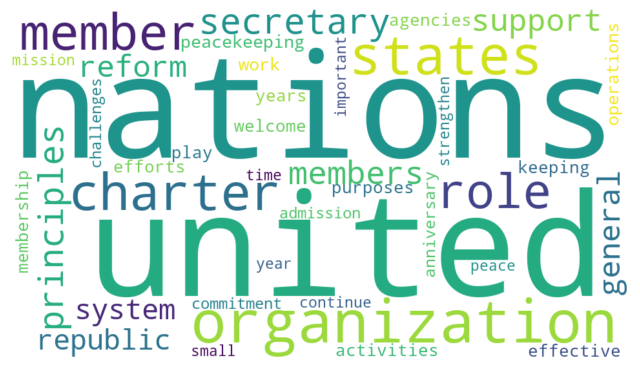

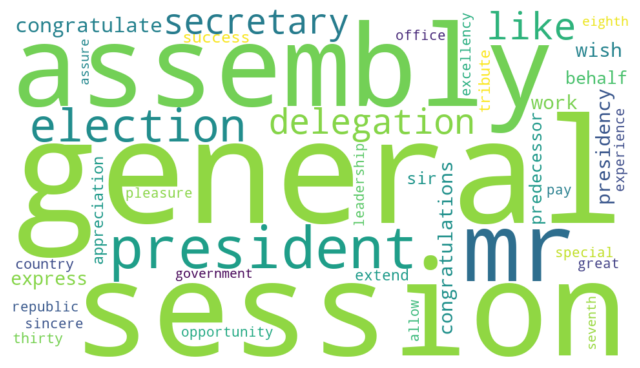

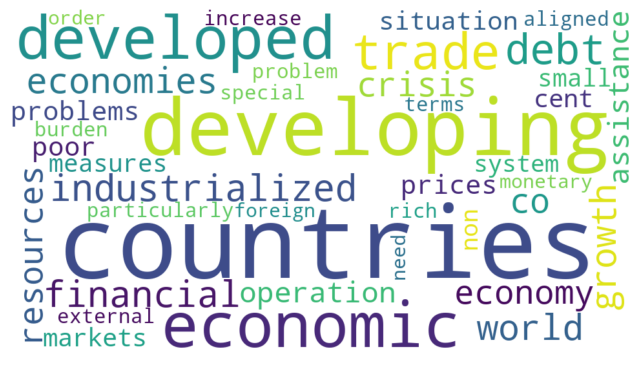

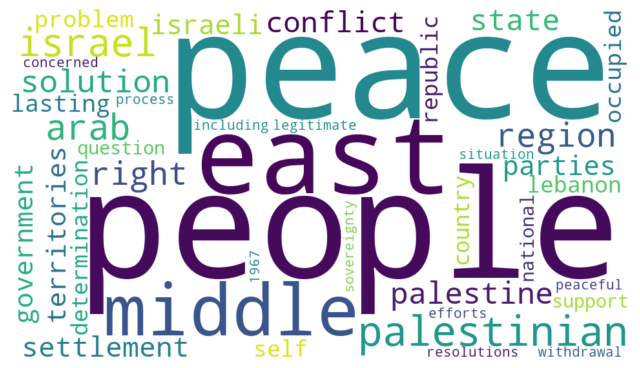

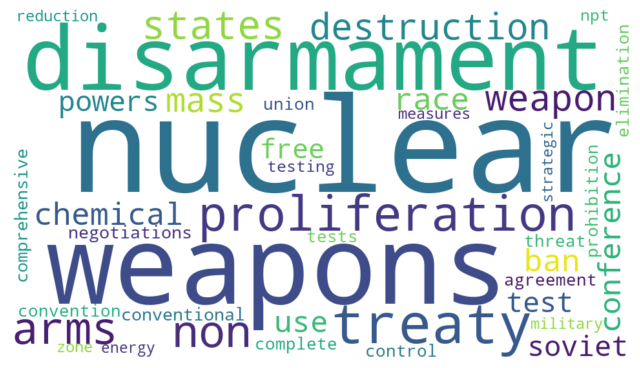

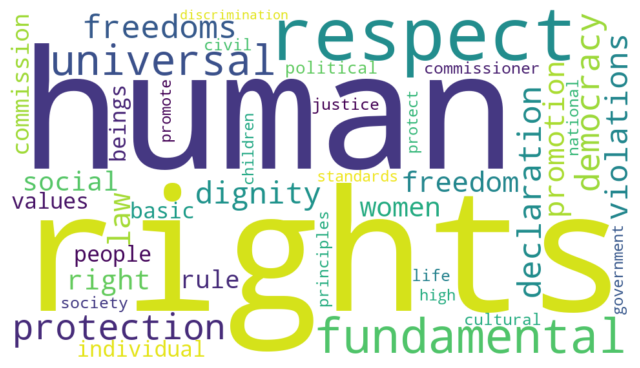

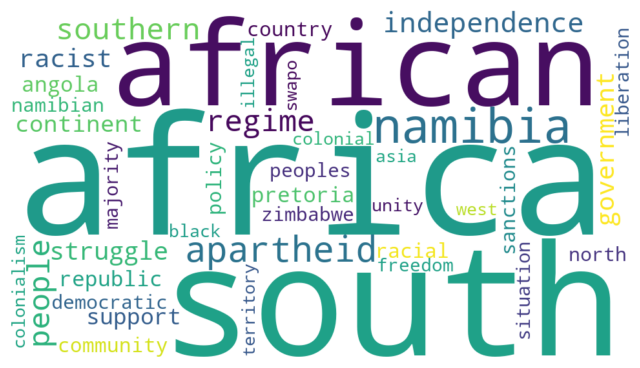

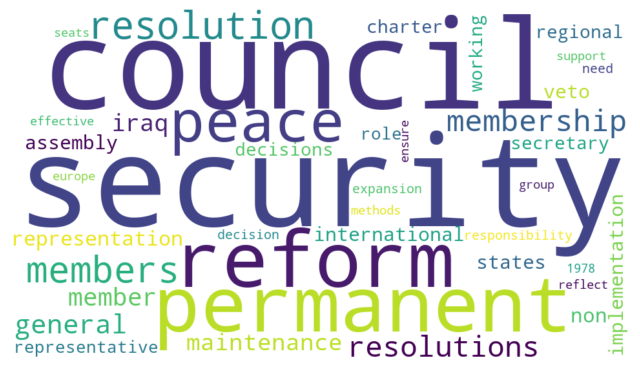

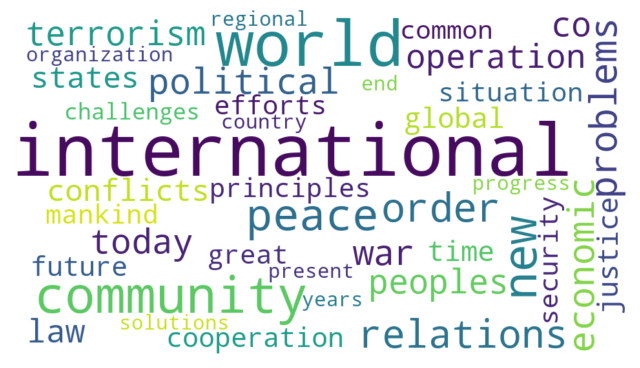

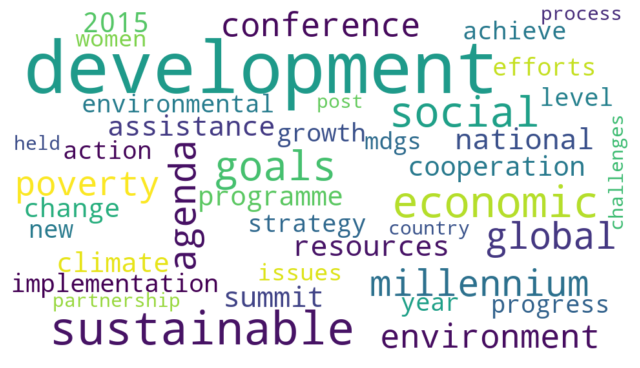

In [30]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

###  Display word clouds for each topic in a given Gensim LDA model

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML  # Updated import statement

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic in range(model.num_topics):
        topic_words = model.get_topic_terms(topic, topn=no_top_words)
        size = {features[word_id]: abs(weight) for word_id, weight in topic_words}
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(8, 8))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')
        plt.show()

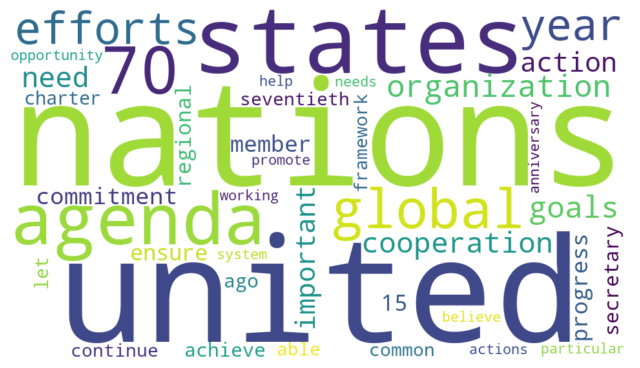

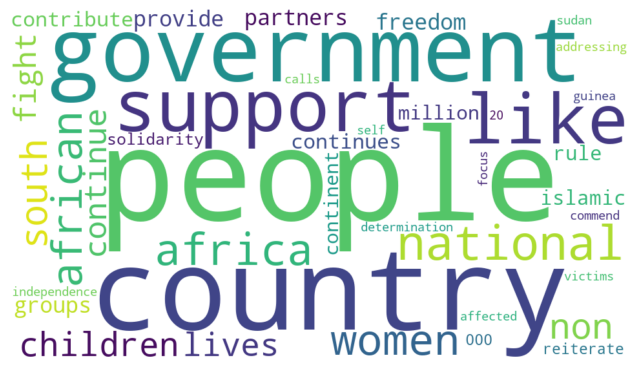

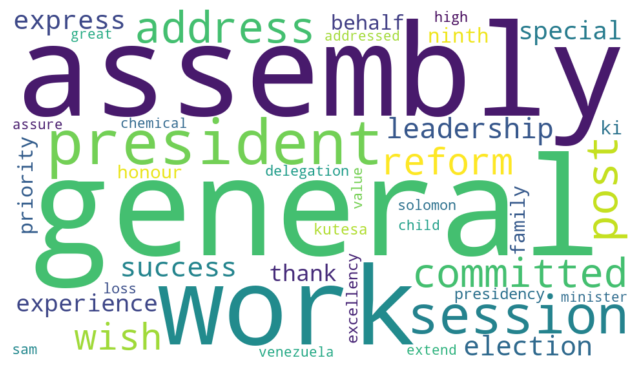

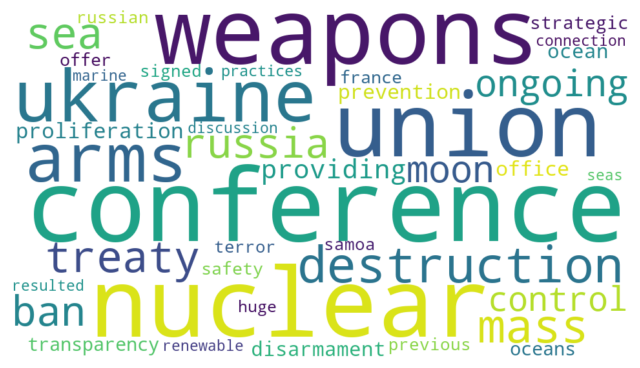

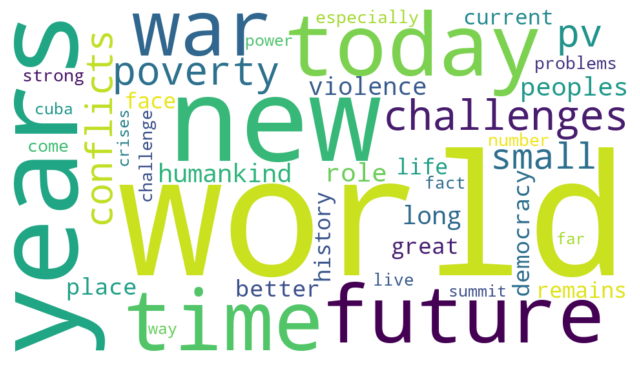

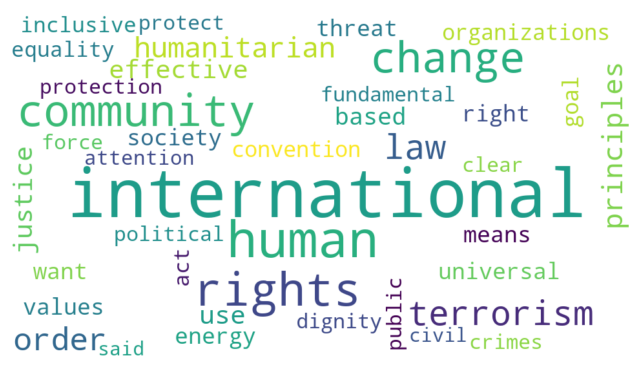

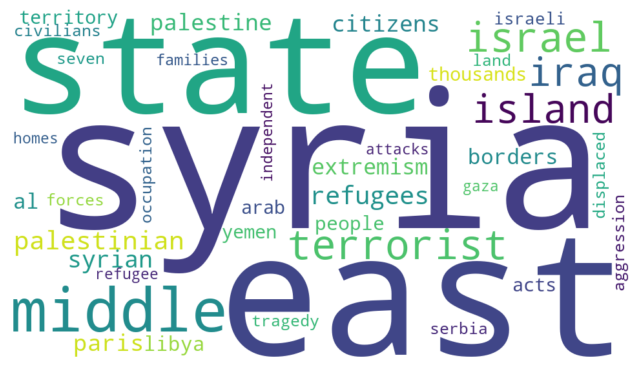

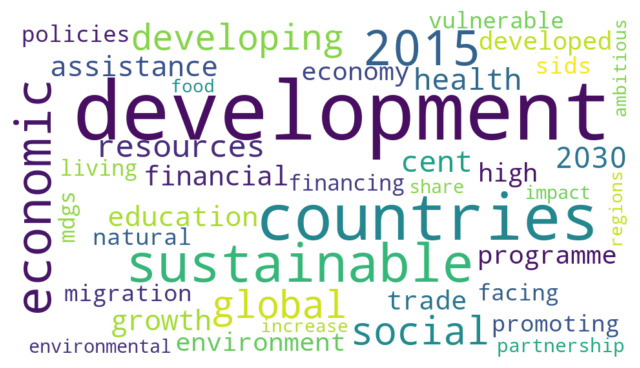

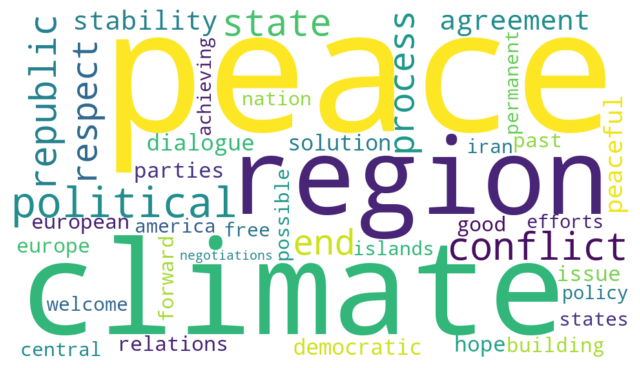

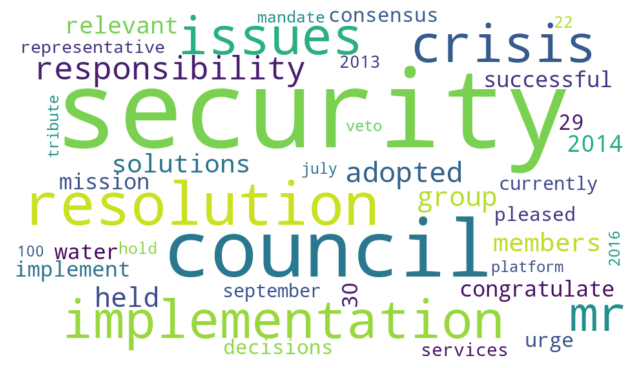

In [45]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


### Generates a list of topic names for an NMF model by concatenating the two most significant words for each topic

In [31]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

### Calculates the average topic distribution per year by transforming the TF-IDF vectors for each year's paragraphs using an NMF model

In [34]:
from tqdm.auto import tqdm
import numpy as np
year_data = []
for year in tqdm(np.unique(np.unique(paragraph_df["year"]))):
    W_year =nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["year"] == year)])
    year_data.append([year] +list(W_year.sum(axis=0)/W_year.sum()*100.0))

C:\Users\tsaiv\anaconda3\anaconda jupyter\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\tsaiv\anaconda3\anaconda jupyter\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\tsaiv\anaconda3\anaconda jupyter\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\tsaiv\anaconda3\anaconda jupyter\Lib\site-packages\ipywidgets\widgets\widget.py:528: Deprec

  0%|          | 0/46 [00:00<?, ?it/s]

###  Area plot of the topic distributions over the years with a specified figure size.

<Axes: xlabel='year'>

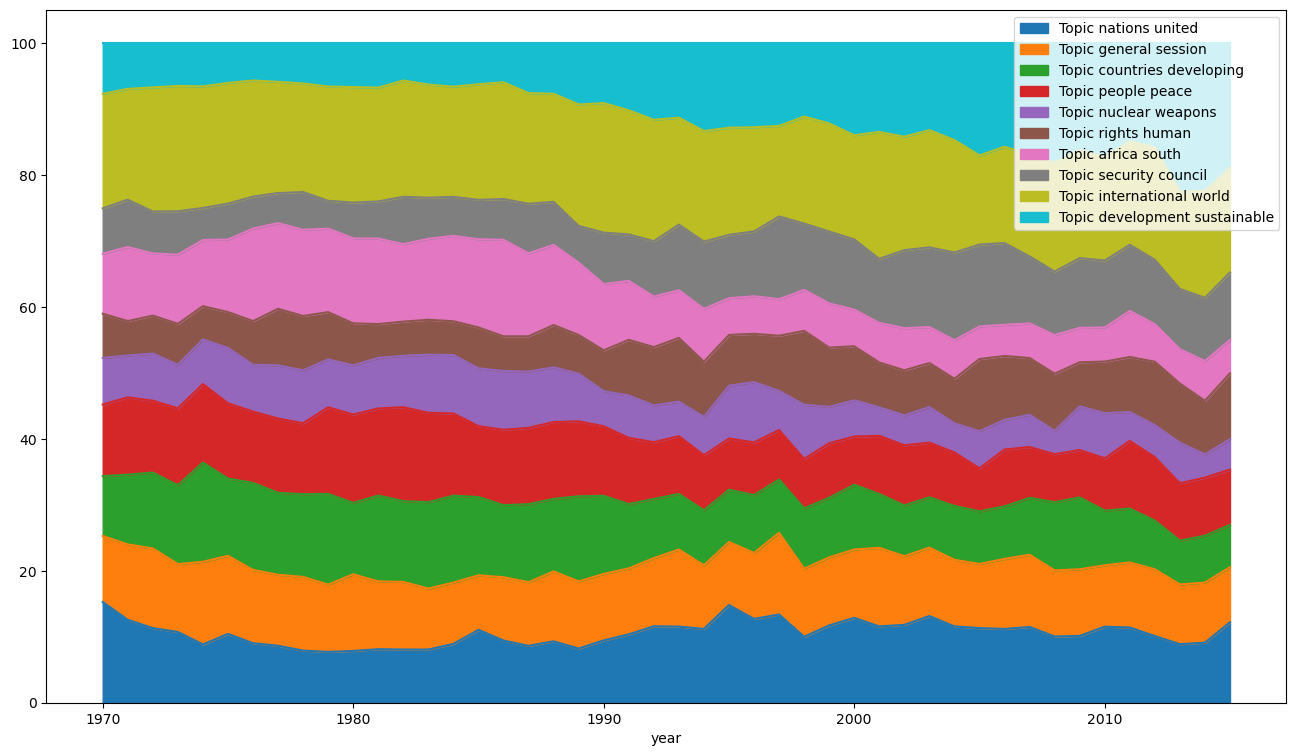

In [33]:
import matplotlib.pyplot as plt

df_year = pd.DataFrame(year_data, columns=["year"] +topic_names).set_index("year")
df_year.plot.area(figsize=(16,9))